# Lab 3: Clustering

The goal of this lab session is to code a clustering algorithm, apply it to data and compare the performance with other techniques.

You have to send the filled notebook named **"L2_familyname1_familyname2.ipynb"** (groups of 2) by email to *lucca.guardiola@centralesupelec.com* by October 29, 2020. Please put **"AML-L3"** in the subject. 

We begin with the standard imports:

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.cluster as cluster
%matplotlib inline
sns.set_context('poster')
sns.set_color_codes()
plot_kwds = {'alpha' : 0.25, 's' : 80, 'linewidths':0}

# I - Implementation of the different clustering algorithms

We will have two toy datasets to try the different methods in order to find the most coherent groups of point for each toy dataset.

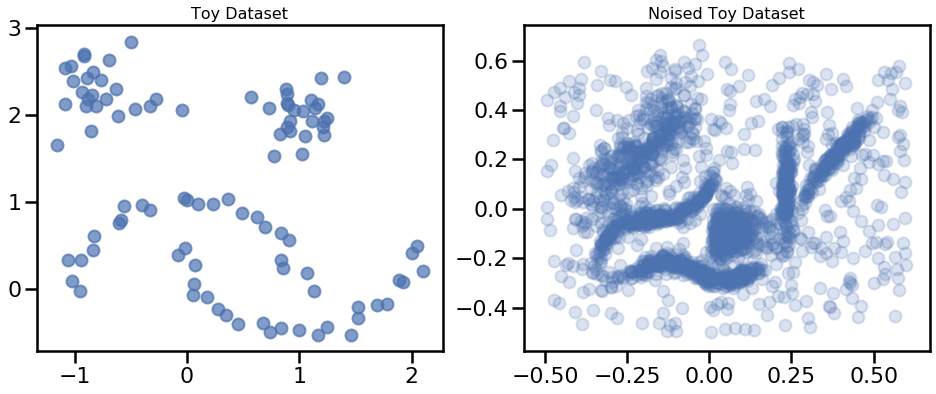

In [2]:
import sklearn.datasets as data
moons, _ = data.make_moons(n_samples=50, noise=0.05)
blobs, _ = data.make_blobs(n_samples=50, centers=[(-0.75,2.25), (1.0, 2.0)], cluster_std=0.25)
test_data_0 = np.vstack([moons, blobs])

test_data_1 = np.load('clusterable_data.npy')

fig, ax = plt.subplots(1, 2, figsize=(16, 6))
ax[0].scatter(test_data_0.T[0], test_data_0.T[1], c='b', alpha=0.7)
ax[0].set_title('Toy Dataset', size=16)

ax[1].scatter(test_data_1.T[0], test_data_1.T[1], color='b', alpha=0.2)
ax[1].set_title('Noised Toy Dataset', size=16)

plt.show();

## I-1 K-means

K-Means is the 'go-to' clustering algorithm for many simply because it is fast, easy to understand, and available everywhere (there's an implementation in almost any statistical or machine learning tool you care to use). However, K-Means has a few problems caused by its simplicity. 

We try the `sklearn` implementation in our toy datasets:

### Task : Train two kmeans models for datasets test_data_0 and test_data_1 with an arbitrary number of clusters then return clustering labels for datasets test_data_0 and test_data_1.

In [3]:
from sklearn.cluster import KMeans

"""
The output should be : 
kmeans_0_labels : list of labels for test_data_0
kmeans_1_labels : list of labels for test_data_1
"""
#TODO
n0 = 4
datas = [test_data_0, test_data_1]
labels = []
for data in datas:
    model = KMeans(n_clusters=n0)
    model.fit(data)
    labels.append(model.labels_)


Text(0.5, 1.0, 'Noised Toy Dataset')

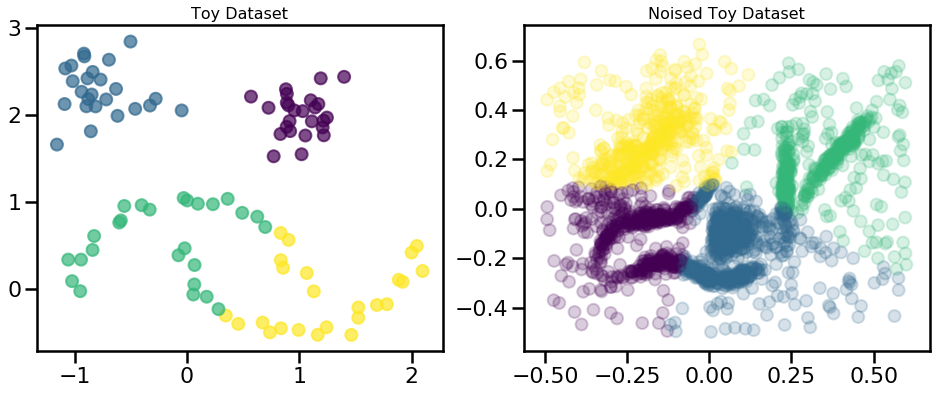

In [4]:
## Plot the results of the clustering - Run this code
kmeans_0_labels, kmeans_1_labels = labels[0], labels[1]
fig, ax = plt.subplots(1, 2, figsize=(16, 6))
ax[0].scatter(test_data_0.T[0], test_data_0.T[1], c=kmeans_0_labels , alpha=0.7)
ax[0].set_title('Toy Dataset', size=16)

ax[1].scatter(test_data_1.T[0], test_data_1.T[1], c=kmeans_1_labels, alpha=0.2)
ax[1].set_title('Noised Toy Dataset', size=16)

## I-2 How do we choose the number of clusters in kmeans ? 
-By knowing in advance the number of clusters you want to create. For instance you want to divide the clients of an investment bank in three groups depicting the clients' willingness to take risks : low-risk investments clients - average risk-investments clients - high-risk investments client

-By plotting the data. Need a 2D/3D data => could be achieved by dimensionnality reduction methods like PCA or t-SNE etc...

-With metrics (Elbow method, davies-bouldin index, silhouette score)

### The elbow method :

The elbow method is often use to choose the number of cluster K. It consists in computing for several K the inertia $I_K$ induced by the clustering. Then choose $K^*$ sush as $K^* = argmax \frac{d^2}{dK^2} I_K$. It means that $K^*$ is the cutoff point where the decreasing of the inertia is going from sharp to slow.


### Question 
Find the expression of the Inertia for clustering. What could be its interpretation in terms of Variance ? 

Answer : 
$$
I_i = \sum_{x \in Ck} D^2(x,m_k)
$$
Interpretation: The variance of the points in the cluster $C_k$ regarding the center $m_k$
Inertia is the quantity of information we get when we are using k clusters. 

### Question 
What could be the reason for choosing $K^*$ like that ?

Answer : 
$K^*$ is the point where the second derivative is the highest, so we use the maximum of the second derivative which is the derivative of quantity of information which corresponds to the added information. We then choose $K^*$ that will give us a maximum of added information on our dataset using $K^*$ clusters.

### Task : Fill the plot_inertia fonction 

In [5]:
def plot_inertia(k_min,k_max,data):
    """ Fit several kmeans models with different K in order to find visually the optimal K with the elbow method 

    Output : 
    plot the inertia as a function of the number of clusters
    """
    inertia = []
    for k in range(k_min,k_max):
        model = KMeans(n_clusters=k)
        model.fit(data)
        inertia.append(model.inertia_)
    plt.plot([k for k in range(k_min,k_max)],inertia)

### Task : Using the plot_inertia function and the elbow method, find visually $K^*$ for test_data_0 and test_data_1 ; then plot your clusterings with the scatterplot

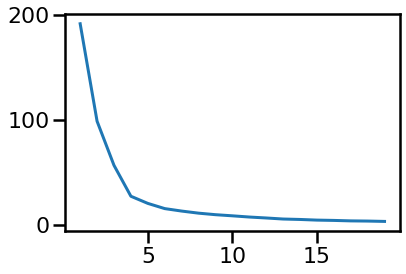

In [6]:
plot_inertia(1, 20, test_data_0)

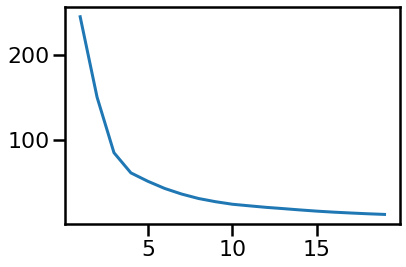

In [7]:
plot_inertia(1, 20, test_data_1)

For both datasets, we conclude visually that $K^* = 4$ should be the solution

## I-3 Aglomerative Single Linkage clustering

Agglomerative clustering is a suite of algorithms all based on the same idea. The fundamental idea is that you start with each point in it's own cluster and then, for each cluster, use some criterion to choose another cluster to merge with. Do this repeatedly until you have only one cluster and you get get a hierarchy, or binary tree, of clusters branching down to the last layer which has a leaf for each point in the dataset. The most basic version of this, single linkage, chooses the closest cluster to merge, and hence the tree can be ranked by distance as to when clusters merged/split.



### Task  : use the cluster.AgglomerativeClustering function of sklearn for dataset test_data_0 and test_data_1 with a single linkage and with the number of cluster of your choice

In [8]:
# TODO
from sklearn.cluster import AgglomerativeClustering


datas = [test_data_0, test_data_1]
linkages = []
for data in datas:
    model_agg = AgglomerativeClustering(
        n_clusters=4,
        linkage="single"
    )
    model_agg.fit(data)
    linkages.append(model_agg)
linkage_0, linkage_1 = linkages[0], linkages[1]


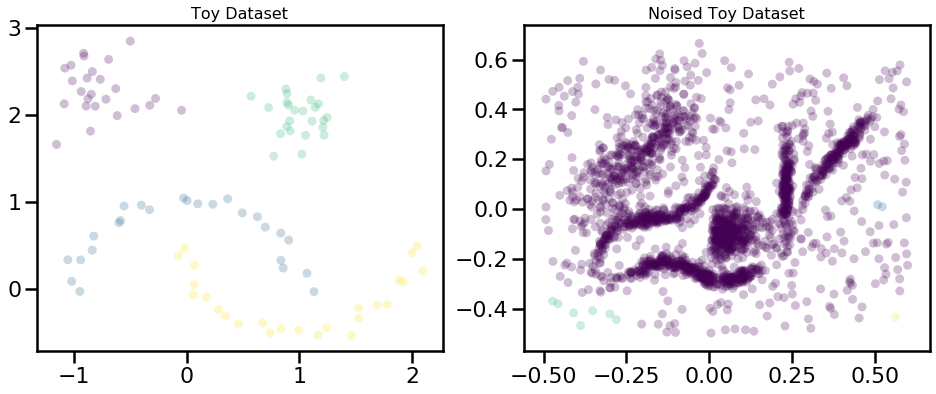

In [9]:
### Plot your results
fig, ax = plt.subplots(1, 2, figsize=(16, 6))
ax[0].scatter(test_data_0.T[0], test_data_0.T[1], c = linkage_0.labels_, **plot_kwds)
ax[0].set_title('Toy Dataset', size=16)

ax[1].scatter(test_data_1.T[0], test_data_1.T[1], c = linkage_1.labels_, **plot_kwds)
ax[1].set_title('Noised Toy Dataset', size=16)

plt.show()

### Question : Comment the results :

Comment: The single linkage is not robust to noise. The clean data clustering is great, but the noisy data are all in the same cluster.

For the Toy data set, single linkage is able to separate correctly the convex forms so it has the ability to detect irregularly shaped clusters where Kmeans fails
For the Noised data it looks like almost all the data points are assigned to one big cluster unlike Kmeans that is able to identify more differenciated clusters 

### Task : Now use the cluster.AgglomerativeClustering function for dataset test_data_0 and test_data_1 with a WARD linkage, and with the number of clusters of your choice. Then plot the results

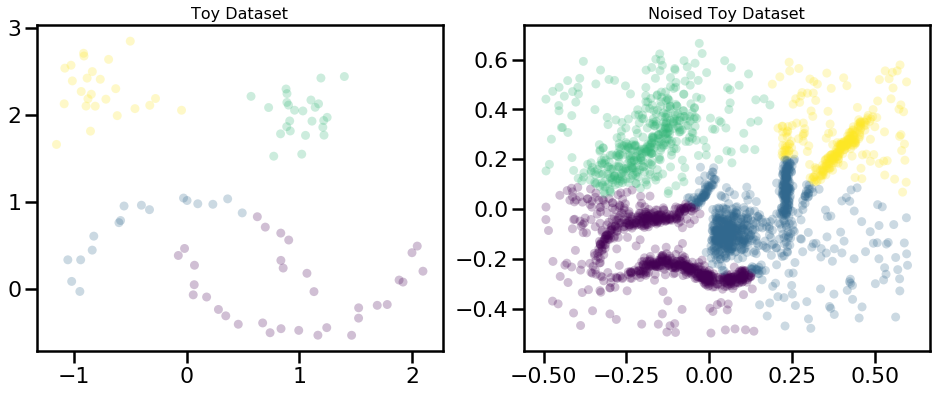

In [10]:
linkages = []
for data in datas:
    model_agg = AgglomerativeClustering(
        n_clusters=4,
        linkage="ward"
    )
    model_agg.fit(data)
    linkages.append(model_agg)
linkage_0, linkage_1 = linkages[0], linkages[1]


### Plot your results
fig, ax = plt.subplots(1, 2, figsize=(16, 6))
ax[0].scatter(test_data_0.T[0], test_data_0.T[1], c = linkage_0.labels_, **plot_kwds)
ax[0].set_title('Toy Dataset', size=16)

ax[1].scatter(test_data_1.T[0], test_data_1.T[1], c = linkage_1.labels_, **plot_kwds)
ax[1].set_title('Noised Toy Dataset', size=16)

plt.show()

### Question : Give a possible explanation of why ward linkage performs better than single linkage

Possible explantion: 
Ward linkage minimizes the variance of the clusters being merged while single uses the minimum of the distances between all observations of the sets.
Since the ward distance takes into account the size of the clusters, it tries to avoid having one big cluster like we have seen with the single linkage

## I-4 DBSCAN

DBSCAN is a density based algorithm -- it assumes clusters for dense regions. It is also the first actual clustering algorithm we've looked at: it doesn't require that every point be assigned to a cluster and hence doesn't partition the data, but instead extracts the 'dense' clusters and leaves sparse background classified as 'noise'. In practice DBSCAN is related to agglomerative clustering. As a first step DBSCAN transforms the space according to the density of the data: points in dense regions are left alone, while points in sparse regions are moved further away. Applying single linkage clustering to the transformed space results in a dendrogram, which we cut according to a distance parameter (called epsilon or `eps` in many implementations) to get clusters. Importantly any singleton clusters at that cut level are deemed to be 'noise' and left unclustered. 

### Apply it to the test_data, how do you tune the parameters?

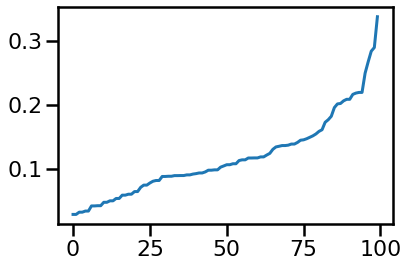

In [11]:
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors

neigh = NearestNeighbors(n_neighbors=4)
nbrs = neigh.fit(test_data_0)
distances, indices = nbrs.kneighbors(test_data_0)
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)


We choose $\epsilon = 0.23$ for test_data_0

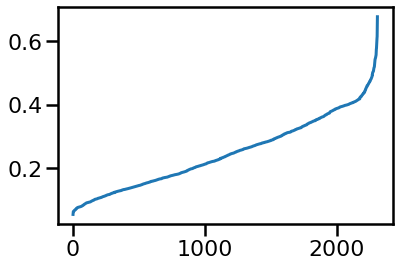

In [12]:
neigh = NearestNeighbors(n_neighbors=100)
nbrs = neigh.fit(test_data_0)
distances, indices = nbrs.kneighbors(test_data_1)
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)


We choose $\epsilon = 0.5$ for test_data_1

In [13]:
from sklearn.cluster import DBSCAN

db0 = DBSCAN(eps=0.24, min_samples=4)
db0.fit(datas[0])

DBSCAN(algorithm='auto', eps=0.24, leaf_size=30, metric='euclidean',
       metric_params=None, min_samples=4, n_jobs=None, p=None)

In [30]:
db1 = DBSCAN(eps= 0.004, min_samples=1)
db1.fit(datas[1])

DBSCAN(algorithm='auto', eps=0.004, leaf_size=30, metric='euclidean',
       metric_params=None, min_samples=1, n_jobs=None, p=None)

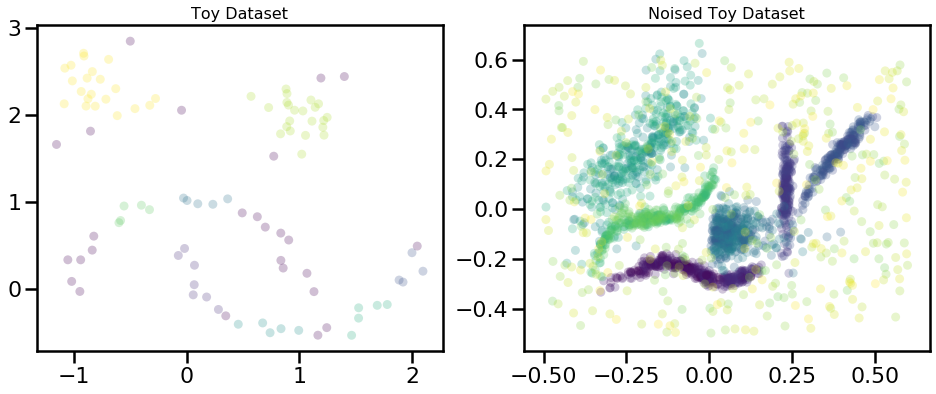

In [31]:
### Plot your results
fig, ax = plt.subplots(1, 2, figsize=(16, 6))
ax[0].scatter(test_data_0.T[0], test_data_0.T[1], c = db0.labels_, **plot_kwds)
ax[0].set_title('Toy Dataset', size=16)

ax[1].scatter(test_data_1.T[0], test_data_1.T[1], c = db1.labels_, **plot_kwds)
ax[1].set_title('Noised Toy Dataset', size=16)

plt.show()

# II Apply the algorithms to the following images and comment the results

## II-2 Color compression

One interesting application of clustering is in color compression within images. 
For example, imagine you have an image with millions of colors.
In most images, a large number of the colors will be unused, and many of the pixels in the image will have similar or even identical colors.
Get a simplified colored version of the following image by applying k-means:

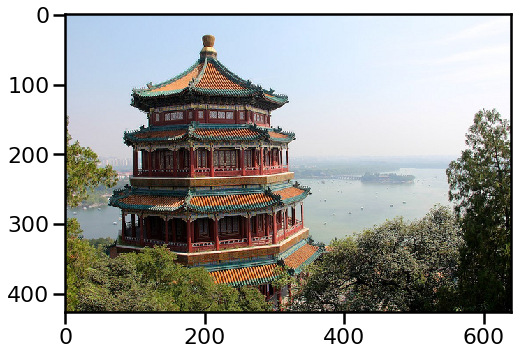

In [64]:
from sklearn.datasets import load_sample_image
from sklearn.utils import shuffle

china = load_sample_image("china.jpg")

fig = plt.figure(figsize=(8, 6))
plt.imshow(china);

In [65]:
data = china / 255.0 # use 0...1 scale
data = data.reshape(427 * 640, 3)

### Apply clustering methods on the colors of the image. 
For each cluster of colors you can assign a new color corresponding to the color vector of the center of the cluster. The sklearn kmeans can provide the center of each cluster with the attributes cluster_centers_

#### Kmeans

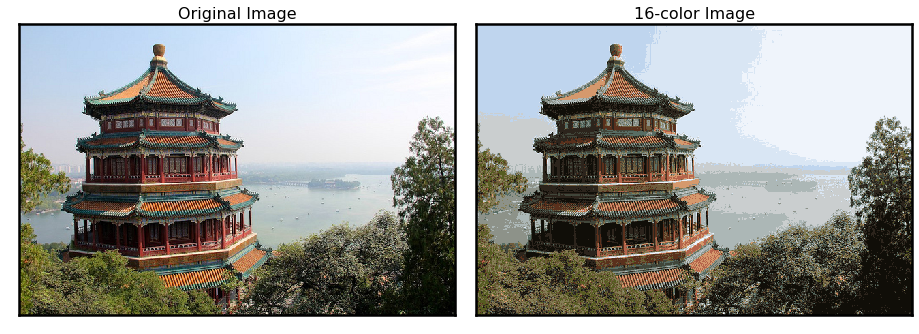

In [73]:
# This function replaces each pixel by its predicted pixel (the cluster mean of the cluster that this pixel belongs to)

def recreate_image(codebook, labels, w, h):
    """Recreate the (compressed) image from the code book & labels"""
    d = codebook.shape[1]
    image = np.zeros((w, h, d))
    label_idx = 0
    for i in range(w):
        for j in range(h):
            image[i][j] = codebook[labels[label_idx]]
            label_idx += 1
    return image

china = load_sample_image("china.jpg")

# Preprocessing the data for clustering

# Convert to floats instead of the default 8 bits integer coding. Dividing by
# 255 is important so that plt.imshow behaves works well on float data (need to
# be in the range [0-1])
china = np.array(china, dtype=np.float64) / 255

# Load Image and transform to a 2D numpy array.
w, h, d = original_shape = tuple(china.shape)
image_array = np.reshape(china, (w * h, d))

# Take a small subset of the pixels
image_array_sample = shuffle(image_array, random_state=0)[:1000]

# Clustering using K-means
kmeans = KMeans(n_clusters=n_colors,  init='k-means++', n_init=10, max_iter=300, random_state=0)
kmeans.fit(image_array_sample)

# Get labels for all points
kmeans_labels = kmeans.predict(image_array)


china_recolored = recreate_image(kmeans.cluster_centers_, kmeans_labels, w, h)

fig, ax = plt.subplots(1, 2, figsize=(16, 6),
                       subplot_kw=dict(xticks=[], yticks=[]))
fig.subplots_adjust(wspace=0.05)
ax[0].imshow(china)
ax[0].set_title('Original Image', size=16)
ax[1].imshow(china_recolored)
ax[1].set_title('16-color Image', size=16);

You must obtain : 

<img src="./Results.png">